# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [5]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [6]:
# Your code here
def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [7]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [8]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  
The mean alone does not convey any information about the spread or variability of the data. The mean can be heavily influenced by outliers or extreme values. A few very high or very low values can skew the mean, making it unrepresentative of the typical values in the dataset. Bootstrapping involves repeatedly sampling (with replacement) from the dataset and recalculating the mean (or another statistic) for each sample. This process generates an empirical distribution of the mean, providing insight into the variability and distribution of the mean.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [9]:
# Add your code here to set the seed

import warnings

def boot_SE(func,
            D,
            n=None,
            B=1000,
            seed=0):
    # NOTE: Suppress FutureWarning in ISLP.models.columns
    # The warning is related to Series.__getitem__ treating keys as positions, which is deprecated.
    # Since ISLP is an external library that I don't control, and this specific warning does not
    # affect my current usage, I'm suppressing it to keep the output clean and focused on relevant information.
    warnings.filterwarnings(action='ignore', category=FutureWarning, module='ISLP.models.columns', lineno=151)
    
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    bootstrap_statistics = np.empty(B)
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
        bootstrap_statistics[i] = value
    return np.sqrt(second_ / B - (first_ / B)**2), bootstrap_statistics

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [10]:
# Your code here

def mean_statistic(data, idx):
    return data.loc[idx, 'Sepal.Length'].mean()

stdev, boot_samples = boot_SE(mean_statistic,
                   df,
                   B=1000,
                   seed=0)

_(vi)_ What is the original mean value of `Sepal.Length`?

5.843333333333334

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

 0.3873333333333342
 
_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.
The boot sample mean is 5.842284666666666 which is almost similar to original mean 5.843333333333334.
The standard deviation of boot sample is 0.06649295592135049

In [11]:
# Add your code here

mean = np.mean(df['Sepal.Length'])
print(f'original mean: {mean}')

t_range = np.ptp(boot_samples)
print(f't range: {t_range}')

b_mean = np.mean(boot_samples)
print(f'boot sample mean: {b_mean}')

b_stdev = np.std(boot_samples)
print(f'boot sample standard deviation: {b_stdev}')

original mean: 5.843333333333334
t range: 0.3873333333333342
boot sample mean: 5.842284666666666
boot sample standard deviation: 0.06649295592099295


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [14]:
# Add your code here

# Calculate the confidence intervals
confidence_level = 0.95
alpha = (1 - confidence_level) / 2
lower_bound = np.percentile(boot_samples, 100 * alpha)
upper_bound = np.percentile(boot_samples, 100 * (1 - alpha))
print(lower_bound, upper_bound)

5.718616666666667 5.974716666666667


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

The figure shows the Histogram of the Mean statistics of the bootstrap sample.

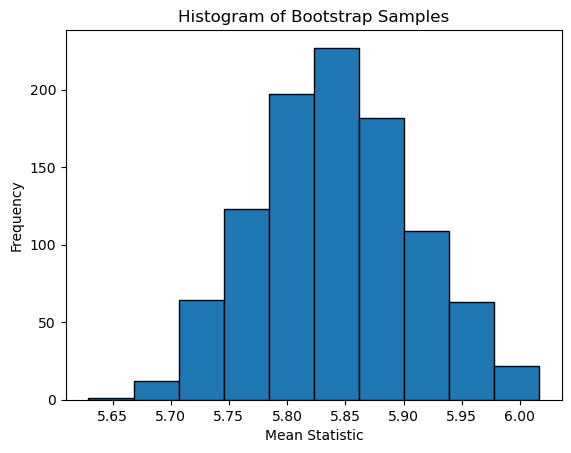

In [15]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_samples, bins=10, edgecolor='black')

# Add a title
ax.set_title('Histogram of Bootstrap Samples')

# Add a label to the x-axis
ax.set_xlabel('Mean Statistic')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here

The company wanted to know the average length of 'iris' petals, to inform space allotment on an upcoming shipment. 
According to the confidence_level calculated on the bootstrap sample means, the upper_bound is 5.974716666666667
which can be inferred also from the histogram above where some of the sample frequencies fall. So, I would recommend
the average length of the 'iris' petals to be rounded off to 6.05 (=> 5.98 + 0.067 (stdev))

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
